In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
fn = ('/Users/67981492/Dropbox/loki_0.5/analysis/aggregated_data/pc_ls_reg_est_df.csv')
fig_path = ('/Users/67981492/Dropbox/loki_0_0.5/pcb_submission_figures/')
reward_df = pd.read_csv(fn)

In [4]:
reward_df.head()

,cpp,b_t0,b_t1,MC,H,signed_B_diff,ideal_B,lambda_val,p_optimal,trial,...,epoch_trial,epoch_number,shifted_epoch_trial,ideal_B_shifted,cpp_shifted,a_est,v_est,projection_0,projection_1,projection_2
0,0.076938,1.038488,3.199304,0.383517,0.0975,0.000000,-2.160816,10.0,0.65,1,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,2.041257,0.579609,0.772618
1,0.319389,1.073995,2.636439,0.604624,0.0975,2.160816,-1.562444,10.0,0.65,2,...,2.0,0.0,2.0,-2.160816,0.076938,1.600865,-0.218766,1.150924,-1.328291,-0.805400
2,0.300755,1.210057,1.084931,0.467104,0.0975,1.562444,0.125126,10.0,0.65,3,...,3.0,0.0,3.0,-1.562444,0.319389,1.594696,-0.096887,3.009108,1.417706,0.189435
3,0.365146,1.297258,2.998052,0.489297,0.0975,-0.125126,-1.700794,10.0,0.65,4,...,4.0,0.0,4.0,0.125126,0.300755,1.595170,0.246846,-2.114903,-1.288882,-0.100573
4,0.074485,1.371289,0.931292,0.456994,0.0975,1.700794,0.439997,10.0,0.65,5,...,5.0,0.0,5.0,-1.700794,0.365146,1.593532,-0.125067,-3.901207,-0.685502,0.416864


In [5]:
reward_df.subj_id.unique(), reward_df.condition.unique()

(array([786, 787, 788, 789]),
 array([6510, 6520, 6530, 7510, 7520, 7530, 8510, 8520, 8530]))

In [6]:
reward_df.groupby(['subj_id', 'condition']).p_accuracy.mean()

subj_id  condition
786      6510         0.443590
         6520         0.555263
         6530         0.629243
         7510         0.586118
         7520         0.514436
         7530         0.616967
         8510         0.656250
         8520         0.737113
         8530         0.816940
787      6510         0.423469
         6520         0.676020
         6530         0.529563
         7510         0.596859
         7520         0.658854
         7530         0.688482
         8510         0.645408
         8520         0.698454
         8530         0.765306
788      6510         0.515228
         6520         0.503836
         6530         0.540682
         7510         0.552910
         7520         0.526854
         7530         0.562334
         8510         0.632124
         8520         0.670185
         8530         0.667539
789      6510         0.541772
         6520         0.544529
         6530         0.484772
         7510         0.461942
         7520       

In [7]:
reward_df.groupby(['subj_id', 'condition']).rt.mean(),reward_df.groupby(['subj_id', 'condition']).rt.std()

(subj_id  condition
 786      6510         0.479388
          6520         0.505842
          6530         0.523958
          7510         0.509823
          7520         0.444458
          7530         0.486809
          8510         0.541361
          8520         0.524460
          8530         0.572090
 787      6510         0.545489
          6520         0.560417
          6530         0.528889
          7510         0.583194
          7520         0.569456
          7530         0.568042
          8510         0.542555
          8520         0.552310
          8530         0.551884
 788      6510         0.395874
          6520         0.393189
          6530         0.464162
          7510         0.415554
          7520         0.395432
          7530         0.480063
          8510         0.476058
          8520         0.542556
          8530         0.508949
 789      6510         0.465246
          6520         0.460120
          6530         0.454858
          7510      

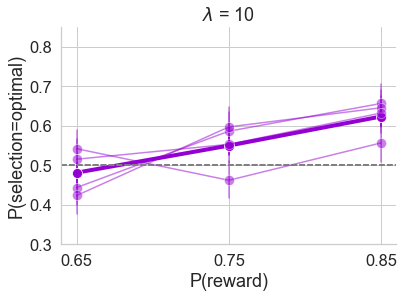

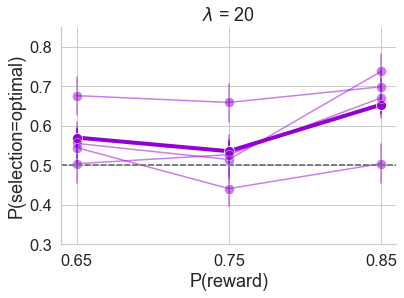

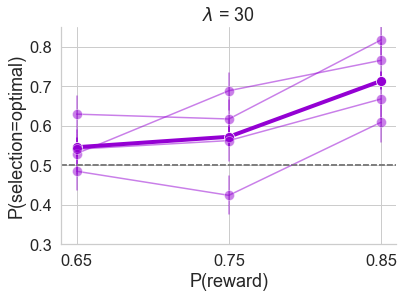

In [17]:
sns.set(font_scale=1.5, style='whitegrid')  


for lambda_val in reward_df.lambda_val.unique(): 
    
    plt.figure()

  
    ax = sns.lineplot('p_optimal', 'p_accuracy', 
          data= reward_df.loc[(reward_df.lambda_val == lambda_val)],
           estimator=np.mean, 
                color='darkviolet', marker='o',
                 dashes=False, alpha=1, markersize=10, 
                      err_style='bars', linewidth=4)



    
    for subj_id in reward_df.subj_id.unique():
        data = reward_df.loc[(reward_df.lambda_val == lambda_val) & 
                            (reward_df.subj_id == subj_id)]
        

        sns.lineplot('p_optimal', 'p_accuracy', 
              data=data,
              ax=ax, estimator=np.mean, 
                    color='darkviolet', marker='o',
                     dashes=False,  alpha=0.5,
                     markersize=10, err_style='bars',
)

        
        
        ax.set(xlabel='P(reward)', ylabel='P(selection=optimal)')
        ax.set(ylim=(0.3, 0.85))

        plt.axhline(y=0.50, ls='--', color='gray')
        plt.title(r'$\lambda$ = ' + str(int(lambda_val)))
        
        ax.set_xticks(reward_df.p_optimal.unique()) 
        ax.set_xticklabels(reward_df.p_optimal.unique())

        sns.despine()

    plt.savefig(os.path.join(fig_path, 'loki0.5_lam' + str(int(lambda_val)) + '_pr_all_acc.png'), dpi=600, bbox_inches='tight', transparent=0)

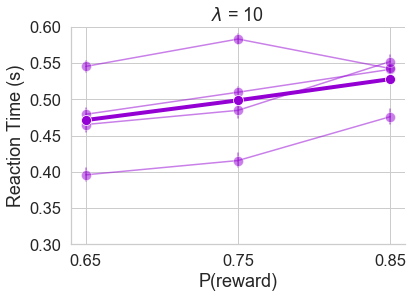

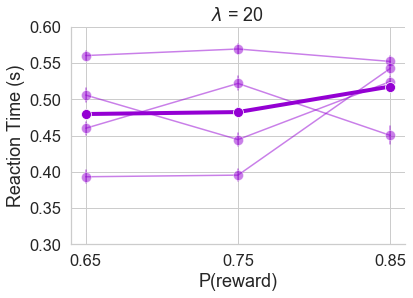

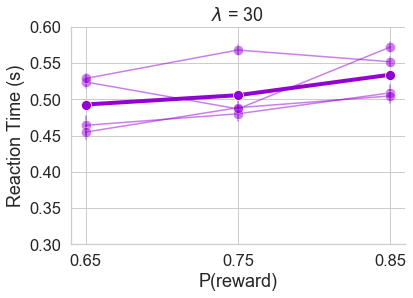

In [74]:
sns.set(font_scale=1.5, style='whitegrid')  


for lambda_val in reward_df.lambda_val.unique(): 
    
    plt.figure()

    
    for subj_id in reward_df.subj_id.unique():
        data = reward_df.loc[(reward_df.lambda_val == lambda_val) & 
                            (reward_df.subj_id == subj_id)]
        

      




        sns.lineplot('p_optimal', 'rt', 
              data=data,
               estimator=np.mean, 
                    color='darkviolet', marker='o',
                     dashes=False,  alpha=0.5,
                     markersize=10, err_style='bars',
)





    ax=sns.lineplot('p_optimal', 'rt', 
    data=reward_df.loc[(reward_df.lambda_val == lambda_val)],
    estimator=np.mean, 
    color='darkviolet', marker='o',
    dashes=False,  alpha=1,
    markersize=10, err_style='bars', linewidth=4
    )


    ax.set(xlabel='P(reward)', ylabel='Reaction Time (s)')

    ax.set_xticks(reward_df.p_optimal.unique()) 
    ax.set_xticklabels(reward_df.p_optimal.unique())



    ax.set(ylim=(0.3, 0.6))

    plt.title(r'$\lambda$ = ' + str(int(lambda_val)))

    sns.despine()

    plt.savefig(os.path.join(fig_path, 'loki0.5_lam' + str(int(lambda_val)) + '_pr_all_rt.png'), dpi=600, bbox_inches='tight', transparent=0)

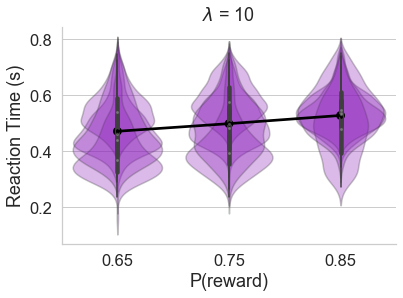

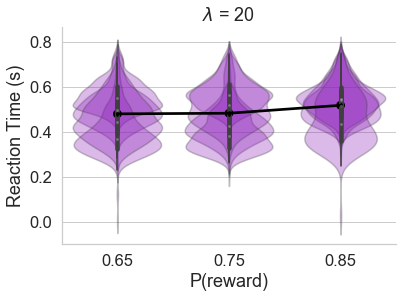

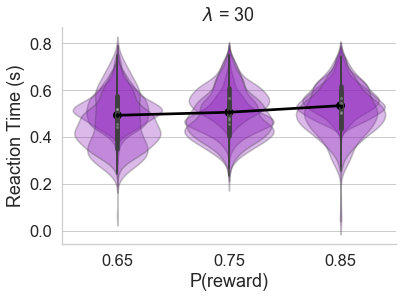

In [82]:
sns.set(font_scale=1.5, style='whitegrid')  


for lambda_val in reward_df.lambda_val.unique(): 
    
    plt.figure()

    
    for subj_id in reward_df.subj_id.unique():
        data = reward_df.loc[(reward_df.lambda_val == lambda_val) & 
                            (reward_df.subj_id == subj_id)]
        

      




        ax=sns.violinplot('p_optimal', 'rt', 
        data=data,
        color='darkviolet', marker='o',

        )


    ax.set_xticks(reward_df.p_optimal.unique()) 
    ax.set_xticklabels(reward_df.p_optimal.unique())



    plt.setp(ax.collections, alpha=.3)



    ax=sns.pointplot('p_optimal', 'rt', 
    data=reward_df.loc[(reward_df.lambda_val == lambda_val)],
    estimator=np.mean, 
    color='black', marker='o',
    dashes=False,  alpha=1,
    markersize=10, err_style='bars', linewidth=4
    )


    ax.set(xlabel='P(reward)', ylabel='Reaction Time (s)')




#     ax.set(ylim=(0.3, 0.6))

    plt.title(r'$\lambda$ = ' + str(int(lambda_val)))

    sns.despine()

    plt.savefig(os.path.join(fig_path, 'loki0.5_lam' + str(int(lambda_val)) + '_pr_all_rt_violin.png'), dpi=600, bbox_inches='tight', transparent=0)